In [114]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [113]:
import warnings 
warnings.filterwarnings('ignore')

### 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [2]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### 2. Подготовьте датасет к обучению моделей.
<b> a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Sex

In [4]:
from sklearn.preprocessing import LabelEncoder

ExerciseAngina

In [5]:
labelencoder = LabelEncoder()
data_ang = labelencoder.fit_transform(data['ExerciseAngina'].values)

In [6]:
ed = pd.DataFrame()
ed['ExerciseAngina'] = data['ExerciseAngina']
ed['num'] = data_ang
ed.drop_duplicates(subset='num', keep='first', inplace=False)

,ExerciseAngina,num
0,N,0
3,Y,1


In [7]:
data['ExerciseAngina'] = data_ang

In [8]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,0,0.0,Flat,1


Sex

In [9]:
selectedColumns = data.copy()
X = pd.get_dummies(selectedColumns, columns=['Sex'])
X

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M
0,40,ATA,140,289,0,Normal,172,0,0.0,Up,0,False,True
1,49,NAP,160,180,0,Normal,156,0,1.0,Flat,1,True,False
2,37,ATA,130,283,0,ST,98,0,0.0,Up,0,False,True
3,48,ASY,138,214,0,Normal,108,1,1.5,Flat,1,True,False
4,54,NAP,150,195,0,Normal,122,0,0.0,Up,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,0,1.2,Flat,1,False,True
914,68,ASY,144,193,1,Normal,141,0,3.4,Flat,1,False,True
915,57,ASY,130,131,0,Normal,115,1,1.2,Flat,1,False,True
916,57,ATA,130,236,0,LVH,174,0,0.0,Flat,1,True,False


ST_Slope

In [10]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [11]:
selectedColumns = X.copy()
X = pd.get_dummies(selectedColumns, columns=['ST_Slope'])
X

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,ATA,140,289,0,Normal,172,0,0.0,0,False,True,False,False,True
1,49,NAP,160,180,0,Normal,156,0,1.0,1,True,False,False,True,False
2,37,ATA,130,283,0,ST,98,0,0.0,0,False,True,False,False,True
3,48,ASY,138,214,0,Normal,108,1,1.5,1,True,False,False,True,False
4,54,NAP,150,195,0,Normal,122,0,0.0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,0,1.2,1,False,True,False,True,False
914,68,ASY,144,193,1,Normal,141,0,3.4,1,False,True,False,True,False
915,57,ASY,130,131,0,Normal,115,1,1.2,1,False,True,False,True,False
916,57,ATA,130,236,0,LVH,174,0,0.0,1,True,False,False,True,False


RestingECG

In [12]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [13]:
selectedColumns = X.copy()
X = pd.get_dummies(selectedColumns, columns=['RestingECG'])
X

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,ATA,140,289,0,172,0,0.0,0,False,True,False,False,True,False,True,False
1,49,NAP,160,180,0,156,0,1.0,1,True,False,False,True,False,False,True,False
2,37,ATA,130,283,0,98,0,0.0,0,False,True,False,False,True,False,False,True
3,48,ASY,138,214,0,108,1,1.5,1,True,False,False,True,False,False,True,False
4,54,NAP,150,195,0,122,0,0.0,0,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,132,0,1.2,1,False,True,False,True,False,False,True,False
914,68,ASY,144,193,1,141,0,3.4,1,False,True,False,True,False,False,True,False
915,57,ASY,130,131,0,115,1,1.2,1,False,True,False,True,False,False,True,False
916,57,ATA,130,236,0,174,0,0.0,1,True,False,False,True,False,True,False,False


ChestPainType

In [14]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [15]:
selectedColumns = X.copy()
X = pd.get_dummies(selectedColumns, columns=['ChestPainType'])
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,172,0,0.0,0,False,True,False,False,True,False,True,False,False,True,False,False
1,49,160,180,0,156,0,1.0,1,True,False,False,True,False,False,True,False,False,False,True,False
2,37,130,283,0,98,0,0.0,0,False,True,False,False,True,False,False,True,False,True,False,False
3,48,138,214,0,108,1,1.5,1,True,False,False,True,False,False,True,False,True,False,False,False
4,54,150,195,0,122,0,0.0,0,False,True,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,0,1.2,1,False,True,False,True,False,False,True,False,False,False,False,True
914,68,144,193,1,141,0,3.4,1,False,True,False,True,False,False,True,False,True,False,False,False
915,57,130,131,0,115,1,1.2,1,False,True,False,True,False,False,True,False,True,False,False,False
916,57,130,236,0,174,0,0.0,1,True,False,False,True,False,True,False,False,False,True,False,False


In [16]:
X_data = X

<b> b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

Возраст: возраст пациента [лет]

Пол: пол пациента [М: Мужчина, Ж: Женщина]

ChestPainType: тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная]

RestingBP: артериальное давление в состоянии покоя [мм рт. ст.]

Холестерин: холестерин сыворотки [мм/дл]

FastingBS: уровень сахара в крови натощак [1: если FastingBS > 120 мг/дл, 0: в противном случае]

ЭКГ покоя: результаты электрокардиограммы покоя [Нормальный: нормальный, ST: наличие аномалий ST-T (инверсия зубца T и/или подъем или депрессия ST > 0,05 мВ), ГЛЖ: вероятная или определенная гипертрофия левого желудочка по критериям Эстеса]

MaxHR: достигнутая максимальная частота пульса [числовое значение от 60 до 202]

Стенокардия при физической нагрузке: стенокардия, вызванная физической нагрузкой [Д: Да, Н: Нет]

Oldpeak: oldpeak = ST [Числовое значение, измеренное при депрессии]

ST_Slope: наклон пикового сегмента ST при нагрузке [Вверх: вверх, Плоский: плоский, Вниз: вниз]

HeartDisease: выходной класс [1: заболевание сердца, 0: нормальное]

(0.0, 700.0)

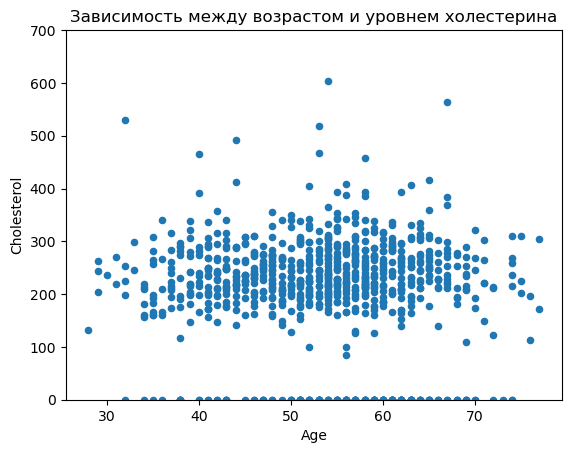

In [17]:
#зависимость уровня холестирина от возраста
# посмотрим на взаимосвязь возраста и зарплаты
data.plot(kind='scatter',
        x='Age',
        y='Cholesterol',
        title='Зависимость между возрастом и уровнем холестерина')
plt.ylim(0, 700)

Нельзя однозначно сказать, что чем старше человек, тем выше уровень холестерина. Плюс есть нулевые значения.

In [18]:
data['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

[Text(0, 0, '0.945517'), Text(0, 0, '0.668912')]

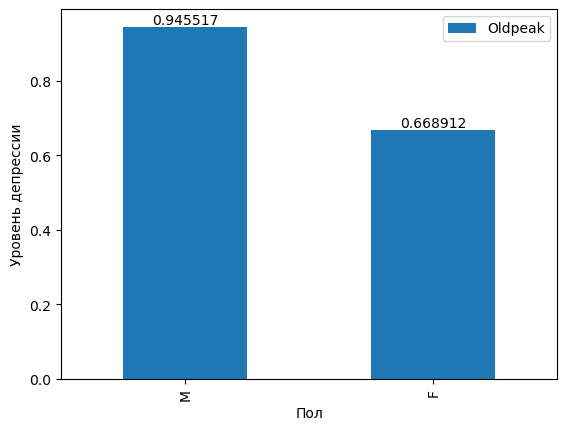

In [19]:
#у кого чаще депрессия, у мужчин или женщин?
#кто работает больше, мужчины или женщины?
time = data[['Oldpeak', 'Sex']].groupby('Sex').mean().sort_values('Oldpeak', ascending=False)
ax = time.plot(kind='bar', title='',
                             xlabel='Пол',
                             ylabel='Уровень депрессии')
ax.bar_label(ax.containers[0])

Мужчинам грустнее, чем женщинам

### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [37]:
X_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,172,0,0.0,0,False,True,False,False,True,False,True,False,False,True,False,False
1,49,160,180,0,156,0,1.0,1,True,False,False,True,False,False,True,False,False,False,True,False
2,37,130,283,0,98,0,0.0,0,False,True,False,False,True,False,False,True,False,True,False,False
3,48,138,214,0,108,1,1.5,1,True,False,False,True,False,False,True,False,True,False,False,False
4,54,150,195,0,122,0,0.0,0,False,True,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,0,1.2,1,False,True,False,True,False,False,True,False,False,False,False,True
914,68,144,193,1,141,0,3.4,1,False,True,False,True,False,False,True,False,True,False,False,False
915,57,130,131,0,115,1,1.2,1,False,True,False,True,False,False,True,False,True,False,False,False
916,57,130,236,0,174,0,0.0,1,True,False,False,True,False,True,False,False,False,True,False,False


In [38]:
X_data.columns.tolist()

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'HeartDisease',
 'Sex_F',
 'Sex_M',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA']

In [39]:
x = X_data[['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA']]
y = X_data[['HeartDisease']]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

### 4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:


<b> a) tree.DecisionTreeClassifier

In [129]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 10, random_state=10) #если не ставить максимальную глубина, метрики все 1.0
clf.fit(x, y)

DecisionTreeClassifier(max_depth=10, random_state=10)

In [130]:
predictions = clf.predict(X_test)

<b> b) ensemble.RandomForestClassifier

In [135]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=50, random_state=10) #n_estomators - кол-во моделей
clf_forest.fit(x, y)

RandomForestClassifier(n_estimators=50, random_state=10)

In [136]:
predictions_forest = clf_forest.predict(X_test)

### 5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [106]:
from sklearn.metrics import classification_report

In [131]:
print(f'Для дерева решений: \n\n{classification_report(y_test, predictions)}') 
#про macro avg и weighted avg https://dzen.ru/a/YAFm2V0OniKGMFu2

Для дерева решений: 

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        86
           1       0.95      0.99      0.97        98

    accuracy                           0.97       184
   macro avg       0.97      0.97      0.97       184
weighted avg       0.97      0.97      0.97       184



In [137]:
print(f'Для случайного леса: \n\n{classification_report(y_test, predictions_forest)}')

Для случайного леса: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        98

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



### 6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

In [57]:
imp = pd.Series(clf_forest.feature_importances_)

In [58]:
imp.index = pd.Series(X_train.columns)

In [59]:
imp = imp.sort_values(ascending=False)
imp

ST_Slope_Up          0.387088
Cholesterol          0.126565
MaxHR                0.099221
ChestPainType_ASY    0.068116
RestingBP            0.067477
Oldpeak              0.064168
Age                  0.056218
Sex_M                0.038201
FastingBS            0.025596
ExerciseAngina       0.025193
RestingECG_ST        0.012835
RestingECG_Normal    0.011832
ST_Slope_Flat        0.007718
ChestPainType_NAP    0.003896
ChestPainType_ATA    0.002938
Sex_F                0.002938
ST_Slope_Down        0.000000
RestingECG_LVH       0.000000
ChestPainType_TA     0.000000
dtype: float64

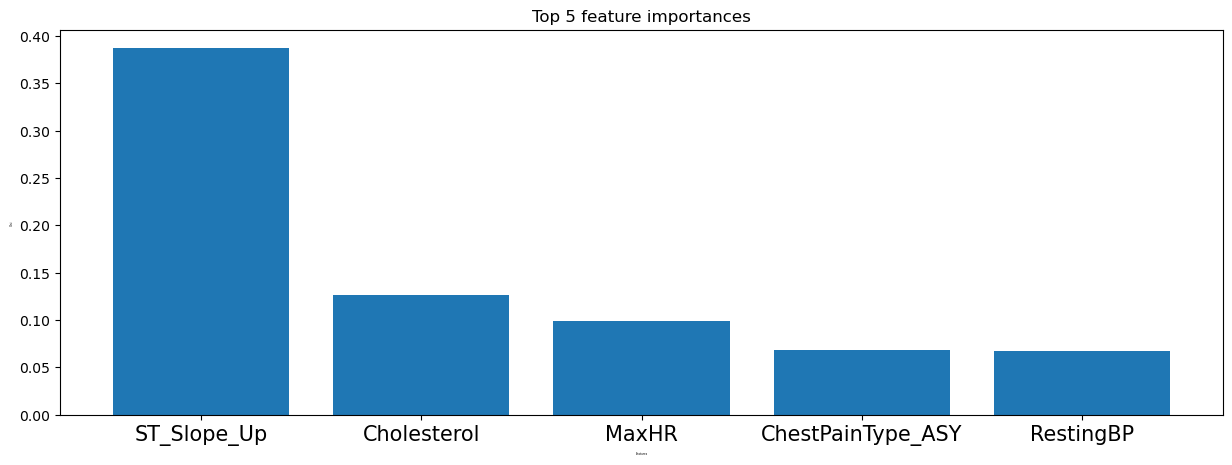

In [95]:
plt.rc('xtick', labelsize= 15) 
plt.figure(figsize=(15,5))
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.show()

### 7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.

In [117]:
from sklearn.ensemble import BaggingClassifier
clf_bagging = BaggingClassifier().fit(x, y)

In [100]:
predictions_bagging = clf_bagging.predict(X_test)

In [101]:
print(f'Для дерева решений: \n\n{classification_report(y_test, predictions_bagging)}')

Для дерева решений: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        86
           1       0.99      0.99      0.99        98

    accuracy                           0.99       184
   macro avg       0.99      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184



### 8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.

In [110]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

Classifier = StackingClassifier([
     ('DecisionTreeClassifier', DecisionTreeClassifier()),
     ('RandomForestClassifier', RandomForestClassifier()),
     ('LinearSVC', LinearSVC())
 ])

In [118]:
Classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier()),
                               ('RandomForestClassifier',
                                RandomForestClassifier()),
                               ('LinearSVC', LinearSVC())])

In [119]:
predictions_stacking = Classifier.predict(X_test)

In [120]:
print(f'Для дерева решений: \n\n{classification_report(y_test, predictions_bagging)}')

Для дерева решений: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        86
           1       0.99      0.99      0.99        98

    accuracy                           0.99       184
   macro avg       0.99      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184



### 9. Сформулируйте выводы по проделанной работе.
<b> a) Сравните метрики построенных моделей.
    
 <i> DecisionTreeClassifier (обычное одинокое дерево)
- Доля правильно предсказанных объектов 97%. (accuracy)
- Доля объектов, названными классификатором положительными и при этом действительно являющимися положительными: 0.95 (precision)
- Доля объектов положительного класса из всех объектов положительного класса, которые нашёл алгоритм: 0.99 (recall)
    
Считаю, что для медицинского предсказания это неплохой результат, так как модель "перестраховывается" и причисляет к больным здоровых людей. Это лучше, чем пропускать больных.
    
 <i>RandomForestClassifier (много деревьев, совмещаем бэггинг и подпространства)
- Абсолютно все показатели равны 1. Идеальная модель.
     
<i> BaggingClassifier (только бэггинг: много деревьев, много сэмплов)
-  Все показатели равны 0.99. Почти идеальная модель.
    
<i>StackingClassifier (много базовых алгоритмов)
- Все показатели равны 0.99. Почти идеальная модель.
    

<b> b) Напишите свое мнение, какая модель наилучшая и почему.

Судя по показателям, лучшая модель со случайным лесом (бэггинг + подпространства).